<a href="https://colab.research.google.com/github/Cecimedeiros/analise_imoveis_pe/blob/main/imoveis_pe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando, lendo e limpando lista de imóveis - PE


Perfil geral dos imóveis:
Qual é o preço médio e mediano dos imóveis em Pernambuco?
Qual é o valor médio e mediano de avaliação dos imóveis?
Qual é a média do percentual de desconto oferecido nos imóveis?
Quais são as cidades com o maior número de imóveis disponíveis?
Quais bairros têm a maior quantidade de imóveis à venda?

Desempenho financeiro:
Quantos imóveis estão subvalorizados (Preço/Valor de Avaliação < 90%) e sobrevalorizados (Preço/Valor de Avaliação > 110%)?
Qual é o desconto médio oferecido em imóveis subvalorizados e sobrevalorizados?
Qual é o preço médio dos imóveis vendidos com maior desconto (por exemplo, acima de 50%)?

Características dos imóveis:
Quais cidades têm os imóveis com os preços mais altos? E os mais baixos?
Quais modalidades de venda são mais comuns na lista?
Existem bairros ou cidades com valores de avaliação consistentemente acima ou abaixo dos preços?

Estratégias de venda:
Qual percentual de imóveis em Pernambuco está com desconto acima da média?
Há algum padrão em bairros/cidades onde os imóveis têm os maiores descontos?
Qual seria o impacto financeiro se os preços dos imóveis sobrevalorizados fossem ajustados para igualar seus valores de avaliação?


In [ ]:
lista_imoveis = "/content/Lista_imoveis_PE.csv"
import numpy as np

In [ ]:
import chardet

with open(lista_imoveis, 'rb') as f:
  result = chardet.detect(f.read())

print(result['encoding'])

ISO-8859-1


In [ ]:
import pandas as pd
lista_lida = pd.read_csv(lista_imoveis, sep= ';', encoding= 'ISO-8859-1', skiprows=2)
lista_lida.head()


,N° do imóvel,UF,Cidade,Bairro,Endereço,Preço,Valor de avaliação,Desconto,Descrição,Modalidade de venda,Link de acesso
0,8444422155307,PE,ABREU E LIMA,PLANALTO,"RUA ESTACAO OUTONO, N. 66, Apto 301, BL B, MAN...","75.375,10","150.000,00",49.75,"Apartamento, 0.00 de área total, 52.70 de área...",Venda Online,https://venda-imoveis.caixa.gov.br/sistema/det...
1,8444416184015,PE,ABREU E LIMA,DESTERRO,"AVENIDA TEJIPIO, N. 16, Apto 104, TERREO","58.371,23","112.800,00",48.26,"Apartamento, 0.00 de área total, 50.32 de área...",Venda Online,https://venda-imoveis.caixa.gov.br/sistema/det...
2,8444419069616,PE,ABREU E LIMA,DESTERRO,"RUA ALAMEDA CUMARU, N. 179, Apto 002","56.922,30","110.000,00",48.26,"Apartamento, 0.00 de área total, 41.70 de área...",Venda Direta Online,https://venda-imoveis.caixa.gov.br/sistema/det...
3,8444408496852,PE,ABREU E LIMA,PLANALTO,"RUA DA LIBERDADE (ANTIGA RUA PROJETADA), N. 241","68.765,85","131.000,00",47.51,"Casa, 52.63 de área total, 52.63 de área priva...",Venda Direta Online,https://venda-imoveis.caixa.gov.br/sistema/det...
4,8555508493679,PE,ABREU E LIMA,MATINHA,"RUA CASTRO ALVES, N. 649, Apto 0, CASA C","68.983,71","131.415,03",47.51,"Casa, 0.00 de área total, 63.09 de área privat...",Venda Online,https://venda-imoveis.caixa.gov.br/sistema/det...


# Observação das informações


In [ ]:
lista_lida.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1598 entries, 0 to 1597
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0    N° do imóvel        1598 non-null   int64  
 1   UF                   1598 non-null   object 
 2   Cidade               1598 non-null   object 
 3   Bairro               1598 non-null   object 
 4   Endereço             1598 non-null   object 
 5   Preço                1598 non-null   object 
 6   Valor de avaliação   1598 non-null   object 
 7   Desconto             1598 non-null   float64
 8   Descrição            1598 non-null   object 
 9   Modalidade de venda  1598 non-null   object 
 10  Link de acesso       1598 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 137.5+ KB


In [ ]:
lista_lida['Valor de avaliação']=lista_lida['Valor de avaliação'].str.replace(r'[R\$]|\.|,', lambda x:'.' if x.group== ',' else "", regex= True)
lista_lida.head()

,N° do imóvel,UF,Cidade,Bairro,Endereço,Preço,Valor de avaliação,Desconto,Descrição,Modalidade de venda,Link de acesso
0,8444422155307,PE,ABREU E LIMA,PLANALTO,"RUA ESTACAO OUTONO, N. 66, Apto 301, BL B, MAN...","75.375,10",15000000,49.75,"Apartamento, 0.00 de área total, 52.70 de área...",Venda Online,https://venda-imoveis.caixa.gov.br/sistema/det...
1,8444416184015,PE,ABREU E LIMA,DESTERRO,"AVENIDA TEJIPIO, N. 16, Apto 104, TERREO","58.371,23",11280000,48.26,"Apartamento, 0.00 de área total, 50.32 de área...",Venda Online,https://venda-imoveis.caixa.gov.br/sistema/det...
2,8444419069616,PE,ABREU E LIMA,DESTERRO,"RUA ALAMEDA CUMARU, N. 179, Apto 002","56.922,30",11000000,48.26,"Apartamento, 0.00 de área total, 41.70 de área...",Venda Direta Online,https://venda-imoveis.caixa.gov.br/sistema/det...
3,8444408496852,PE,ABREU E LIMA,PLANALTO,"RUA DA LIBERDADE (ANTIGA RUA PROJETADA), N. 241","68.765,85",13100000,47.51,"Casa, 52.63 de área total, 52.63 de área priva...",Venda Direta Online,https://venda-imoveis.caixa.gov.br/sistema/det...
4,8555508493679,PE,ABREU E LIMA,MATINHA,"RUA CASTRO ALVES, N. 649, Apto 0, CASA C","68.983,71",13141503,47.51,"Casa, 0.00 de área total, 63.09 de área privat...",Venda Online,https://venda-imoveis.caixa.gov.br/sistema/det...


In [ ]:
lista_lida['Preço']= lista_lida['Preço'].str.replace(r'[R\$]|\.|,', lambda x: '.' if x.group==',' else "", regex=True)
lista_lida.head()

,N° do imóvel,UF,Cidade,Bairro,Endereço,Preço,Valor de avaliação,Desconto,Descrição,Modalidade de venda,Link de acesso
0,8444422155307,PE,ABREU E LIMA,PLANALTO,"RUA ESTACAO OUTONO, N. 66, Apto 301, BL B, MAN...",7537510,15000000,49.75,"Apartamento, 0.00 de área total, 52.70 de área...",Venda Online,https://venda-imoveis.caixa.gov.br/sistema/det...
1,8444416184015,PE,ABREU E LIMA,DESTERRO,"AVENIDA TEJIPIO, N. 16, Apto 104, TERREO",5837123,11280000,48.26,"Apartamento, 0.00 de área total, 50.32 de área...",Venda Online,https://venda-imoveis.caixa.gov.br/sistema/det...
2,8444419069616,PE,ABREU E LIMA,DESTERRO,"RUA ALAMEDA CUMARU, N. 179, Apto 002",5692230,11000000,48.26,"Apartamento, 0.00 de área total, 41.70 de área...",Venda Direta Online,https://venda-imoveis.caixa.gov.br/sistema/det...
3,8444408496852,PE,ABREU E LIMA,PLANALTO,"RUA DA LIBERDADE (ANTIGA RUA PROJETADA), N. 241",6876585,13100000,47.51,"Casa, 52.63 de área total, 52.63 de área priva...",Venda Direta Online,https://venda-imoveis.caixa.gov.br/sistema/det...
4,8555508493679,PE,ABREU E LIMA,MATINHA,"RUA CASTRO ALVES, N. 649, Apto 0, CASA C",6898371,13141503,47.51,"Casa, 0.00 de área total, 63.09 de área privat...",Venda Online,https://venda-imoveis.caixa.gov.br/sistema/det...


In [ ]:
lista_lida['Preço'] = pd.to_numeric(lista_lida['Preço'])
lista_lida['Valor de avaliação'] = pd.to_numeric(lista_lida['Valor de avaliação'])
lista_lida.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1598 entries, 0 to 1597
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0    N° do imóvel        1598 non-null   int64  
 1   UF                   1598 non-null   object 
 2   Cidade               1598 non-null   object 
 3   Bairro               1598 non-null   object 
 4   Endereço             1598 non-null   object 
 5   Preço                1598 non-null   int64  
 6   Valor de avaliação   1598 non-null   int64  
 7   Desconto             1598 non-null   float64
 8   Descrição            1598 non-null   object 
 9   Modalidade de venda  1598 non-null   object 
 10  Link de acesso       1598 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 137.5+ KB


In [ ]:
lista_lida[' N° do imóvel'] = lista_lida[' N° do imóvel'].astype(str)
lista_lida.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1598 entries, 0 to 1597
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0    N° do imóvel        1598 non-null   object 
 1   UF                   1598 non-null   object 
 2   Cidade               1598 non-null   object 
 3   Bairro               1598 non-null   object 
 4   Endereço             1598 non-null   object 
 5   Preço                1598 non-null   int64  
 6   Valor de avaliação   1598 non-null   int64  
 7   Desconto             1598 non-null   float64
 8   Descrição            1598 non-null   object 
 9   Modalidade de venda  1598 non-null   object 
 10  Link de acesso       1598 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 137.5+ KB


In [ ]:
# Definindo o formato para exibição com 2 casas decimais
pd.options.display.float_format = '{:,.2f}'.format

# Agora, ao rodar o describe(), os valores serão exibidos com 2 casas decimais
print(lista_lida.describe())



               Preço  Valor de avaliação  Desconto
count       1,598.00            1,598.00  1,598.00
mean    9,514,994.57       14,025,999.61     36.41
std     9,350,994.14       11,585,067.00     17.04
min     2,476,102.00        3,800,000.00      0.00
25%     5,795,725.00       10,500,000.00     39.58
50%     7,237,983.50       12,500,000.00     42.11
75%     9,481,514.00       14,200,000.00     46.92
max   140,000,000.00      196,400,000.00     61.70


# Tratando outliers


In [ ]:
Q1 = lista_lida['Preço'].quantile(0.25)
Q3 = lista_lida['Preço'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)


3685789.0


In [ ]:
q1= lista_lida['Valor de avaliação'].quantile(0.25)
q3= lista_lida['Valor de avaliação'].quantile(0.75)
IQR= q3-q1
print(IQR)

3700000.0


In [ ]:
#identificando outliers
limite_inferior_preco= Q1 - 1.5* IQR
limite_superior_preco= Q3 + 1.5* IQR
print(limite_inferior_preco, limite_superior_preco)

245725.0 15031514.0


In [ ]:
limite_inferior_valor= q1 - 1.5 *IQR
limite_superior_valor = q3 + 1.5*IQR
print(limite_inferior_valor, limite_superior_valor)

4950000.0 19750000.0


In [ ]:
lista_lida.loc[lista_lida['Preço']<limite_inferior_preco]


,N° do imóvel,UF,Cidade,Bairro,Endereço,Preço,Valor de avaliação,Desconto,Descrição,Modalidade de venda,Link de acesso


In [ ]:
outliers_preco= lista_lida.loc[lista_lida['Preço']> limite_superior_preco]
outliers_preco

,N° do imóvel,UF,Cidade,Bairro,Endereço,Preço,Valor de avaliação,Desconto,Descrição,Modalidade de venda,Link de acesso
12,8555518210467,PE,ABREU E LIMA,JARDIM CAETES,"TRAVESSA DA RUA CARUARU, N. 778, L 06 Q 28",20633050,35000000,41.05,"Casa, 0.00 de área total, 142.40 de área priva...",Venda Online,https://venda-imoveis.caixa.gov.br/sistema/det...
23,1444413516760,PE,AFOGADOS DA INGAZEIRA,BAIRRO BROTAS,"RUA MECANICO DOMINGOS FERREIRA LIMA NUMERO 43,...",20161437,33300000,39.46,"Casa, 0.00 de área total, 223.65 de área priva...",Venda Direta Online,https://venda-imoveis.caixa.gov.br/sistema/det...
33,8444411966350,PE,ARARIPINA,Alto da Boa Vista,"RUA PROJETADA, N. 214",16188621,29100000,44.37,"Casa, 0.00 de área total, 103.74 de área priva...",Venda Direta Online,https://venda-imoveis.caixa.gov.br/sistema/det...
36,1555519856435,PE,ARARIPINA,CANASTRA,"RUA VEREADOR FRANCISCO JEU DE ANDRADE, N. SN, .",19890433,31209770,36.27,"Terreno, 0.00 de área total, 0.00 de área priv...",Venda Online,https://venda-imoveis.caixa.gov.br/sistema/det...
39,1444414950960,PE,ARARIPINA,SAO PEDRO,"RUA MARIA DA SALETE ALENCAR GUALTER PEREIRA, N...",19751409,17800000,0.00,"Casa, 0.00 de área total, 101.70 de área priva...",Leilão SFI - Edital Único,https://venda-imoveis.caixa.gov.br/sistema/det...
...,...,...,...,...,...,...,...,...,...,...,...
1571,1444418792952,PE,SERRA TALHADA,NOSSA SENHORA DA PENHA,"RUA HENRIQUE DE MELO, N. 264, 1° ANDAR",21061831,19286938,0.00,"Casa, 0.00 de área total, 89.87 de área privat...",Leilão SFI - Edital Único,https://venda-imoveis.caixa.gov.br/sistema/det...
1572,1444417492742,PE,SIRINHAEM,BARRA DE SIRINHAEM,"RUA PROJETADA, N. SN, LT 19, QD J",46644831,73189682,36.27,"Casa, 0.00 de área total, 300.00 de área priva...",Venda Online,https://venda-imoveis.caixa.gov.br/sistema/det...
1580,1444404942949,PE,SURUBIM,DO COQUEIRO,"RUA ANTONIO MARTINS LEAL, N. 97, LT 14 QD A 1",17661733,12700000,0.00,"Casa, 0.00 de área total, 66.50 de área privat...",Leilão SFI - Edital Único,https://venda-imoveis.caixa.gov.br/sistema/det...
1594,8444413886736,PE,VITORIA DE SANTO ANTAO,BELA VISTA,"RUA PROJETADA, N. 83, LT 06-A4, QD F, CS 83",17526143,27500000,36.27,"Casa, 0.00 de área total, 100.81 de área priva...",Venda Direta Online,https://venda-imoveis.caixa.gov.br/sistema/det...


In [ ]:
outliers_index= outliers_preco.index
lista_sem_outliers= lista_lida.drop(outliers_index)
lista_sem_outliers

,N° do imóvel,UF,Cidade,Bairro,Endereço,Preço,Valor de avaliação,Desconto,Descrição,Modalidade de venda,Link de acesso,Percentual
0,8444422155307,PE,ABREU E LIMA,PLANALTO,"RUA ESTACAO OUTONO, N. 66, Apto 301, BL B, MAN...",7537510,15000000,49.75,"Apartamento, 0.00 de área total, 52.70 de área...",Venda Online,https://venda-imoveis.caixa.gov.br/sistema/det...,50.25
1,8444416184015,PE,ABREU E LIMA,DESTERRO,"AVENIDA TEJIPIO, N. 16, Apto 104, TERREO",5837123,11280000,48.26,"Apartamento, 0.00 de área total, 50.32 de área...",Venda Online,https://venda-imoveis.caixa.gov.br/sistema/det...,51.75
2,8444419069616,PE,ABREU E LIMA,DESTERRO,"RUA ALAMEDA CUMARU, N. 179, Apto 002",5692230,11000000,48.26,"Apartamento, 0.00 de área total, 41.70 de área...",Venda Direta Online,https://venda-imoveis.caixa.gov.br/sistema/det...,51.75
3,8444408496852,PE,ABREU E LIMA,PLANALTO,"RUA DA LIBERDADE (ANTIGA RUA PROJETADA), N. 241",6876585,13100000,47.51,"Casa, 52.63 de área total, 52.63 de área priva...",Venda Direta Online,https://venda-imoveis.caixa.gov.br/sistema/det...,52.49
4,8555508493679,PE,ABREU E LIMA,MATINHA,"RUA CASTRO ALVES, N. 649, Apto 0, CASA C",6898371,13141503,47.51,"Casa, 0.00 de área total, 63.09 de área privat...",Venda Online,https://venda-imoveis.caixa.gov.br/sistema/det...,52.49
...,...,...,...,...,...,...,...,...,...,...,...,...
1591,8444415364460,PE,VITORIA DE SANTO ANTAO,AREA RURAL DE VITORIA DO SANTO ANTAO,"RUA 7, N. 174, LT 32A QD 30",8521652,14555407,41.46,"Casa, 0.00 de área total, 65.91 de área privat...",Venda Direta Online,https://venda-imoveis.caixa.gov.br/sistema/det...,58.55
1592,8444422218724,PE,VITORIA DE SANTO ANTAO,PIRITUBA,"RUA PROJETADA, N. 608, LT 27 QD M",9751386,16455408,40.75,"Casa, 0.00 de área total, 70.85 de área privat...",Venda Direta Online,https://venda-imoveis.caixa.gov.br/sistema/det...,59.26
1593,1444412242594,PE,VITORIA DE SANTO ANTAO,BELA VISTA,"RUA DOZE, N. 49, LT 36, QD U",5472701,9061849,39.61,"Casa, 0.00 de área total, 50.73 de área privat...",Venda Direta Online,https://venda-imoveis.caixa.gov.br/sistema/det...,60.39
1595,8555529555550,PE,VITORIA DE SANTO ANTAO,BELA VISTA,"RUA PROJETADA, N. SN, Apto 2, BL 09",10450000,10450000,0.00,"Apartamento, 0.00 de área total, 41.55 de área...",Leilão SFI - Edital Único,https://venda-imoveis.caixa.gov.br/sistema/det...,100.00


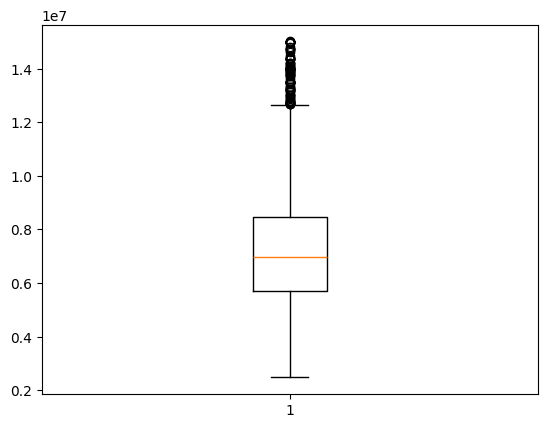

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(lista_sem_outliers['Preço'])
plt.show()
#lista_sem_outliers= lista_lida.drop(outliers_index)

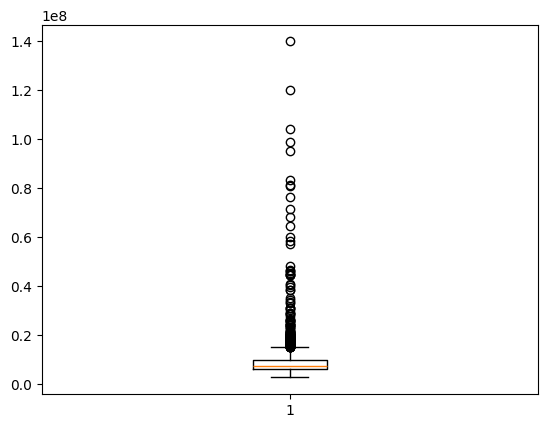

In [ ]:
plt.boxplot(lista_lida['Preço'])
plt.show()

In [ ]:
lista_sem_outliers.describe()

,Preço,Valor de avaliação,Desconto,Percentual
count,"1,427.00","1,427.00","1,427.00","1,427.00"
mean,"7,407,833.64","12,141,214.74",39.69,61.11
std,"2,482,546.13","2,766,956.38",13.85,16.83
min,"2,476,102.00","3,800,000.00",0.00,38.31
25%,"5,692,230.00","10,300,000.00",41.46,52.62
50%,"6,965,592.00","12,140,000.00",42.68,57.32
75%,"8,475,435.00","13,700,000.00",47.39,58.55
max,"15,009,772.00","25,400,000.00",61.70,188.88


In [ ]:
lista_sem_outliers.to_csv('Lista_sem_outliers.csv', index=False)

# Analisando imóveis subvalorizados e sobrevalorizados


In [ ]:
lista_sem_outliers['Percentual'] = (lista_sem_outliers['Preço'] / lista_sem_outliers['Valor de avaliação']) * 100
lista_sem_outliers['Percentual']

,Percentual
0,50.25
1,51.75
2,51.75
3,52.49
4,52.49
...,...
1591,58.55
1592,59.26
1593,60.39
1595,100.00


In [ ]:
imoveis_subvalorizados= lista_sem_outliers[lista_sem_outliers['Percentual']<90]
imoveis_subvalorizados

,N° do imóvel,UF,Cidade,Bairro,Endereço,Preço,Valor de avaliação,Desconto,Descrição,Modalidade de venda,Link de acesso,Percentual
0,8444422155307,PE,ABREU E LIMA,PLANALTO,"RUA ESTACAO OUTONO, N. 66, Apto 301, BL B, MAN...",7537510,15000000,49.75,"Apartamento, 0.00 de área total, 52.70 de área...",Venda Online,https://venda-imoveis.caixa.gov.br/sistema/det...,50.25
1,8444416184015,PE,ABREU E LIMA,DESTERRO,"AVENIDA TEJIPIO, N. 16, Apto 104, TERREO",5837123,11280000,48.26,"Apartamento, 0.00 de área total, 50.32 de área...",Venda Online,https://venda-imoveis.caixa.gov.br/sistema/det...,51.75
2,8444419069616,PE,ABREU E LIMA,DESTERRO,"RUA ALAMEDA CUMARU, N. 179, Apto 002",5692230,11000000,48.26,"Apartamento, 0.00 de área total, 41.70 de área...",Venda Direta Online,https://venda-imoveis.caixa.gov.br/sistema/det...,51.75
3,8444408496852,PE,ABREU E LIMA,PLANALTO,"RUA DA LIBERDADE (ANTIGA RUA PROJETADA), N. 241",6876585,13100000,47.51,"Casa, 52.63 de área total, 52.63 de área priva...",Venda Direta Online,https://venda-imoveis.caixa.gov.br/sistema/det...,52.49
4,8555508493679,PE,ABREU E LIMA,MATINHA,"RUA CASTRO ALVES, N. 649, Apto 0, CASA C",6898371,13141503,47.51,"Casa, 0.00 de área total, 63.09 de área privat...",Venda Online,https://venda-imoveis.caixa.gov.br/sistema/det...,52.49
...,...,...,...,...,...,...,...,...,...,...,...,...
1589,8444416421661,PE,VITORIA DE SANTO ANTAO,BELA VISTA,"RUA 10, N. 25, QD Q LLT 14",7050767,12300000,42.68,"Casa, 0.00 de área total, 64.08 de área privat...",Venda Direta Online,https://venda-imoveis.caixa.gov.br/sistema/det...,57.32
1590,8444415923841,PE,VITORIA DE SANTO ANTAO,AGUA BRANCA,"RUA PROJETADA 11, N. 85, QD 12, LT 11",7414696,12800000,42.08,"Casa, 0.00 de área total, 60.00 de área privat...",Venda Direta Online,https://venda-imoveis.caixa.gov.br/sistema/det...,57.93
1591,8444415364460,PE,VITORIA DE SANTO ANTAO,AREA RURAL DE VITORIA DO SANTO ANTAO,"RUA 7, N. 174, LT 32A QD 30",8521652,14555407,41.46,"Casa, 0.00 de área total, 65.91 de área privat...",Venda Direta Online,https://venda-imoveis.caixa.gov.br/sistema/det...,58.55
1592,8444422218724,PE,VITORIA DE SANTO ANTAO,PIRITUBA,"RUA PROJETADA, N. 608, LT 27 QD M",9751386,16455408,40.75,"Casa, 0.00 de área total, 70.85 de área privat...",Venda Direta Online,https://venda-imoveis.caixa.gov.br/sistema/det...,59.26


In [ ]:
top_cidades_subvalorizadas= imoveis_subvalorizados['Cidade'].value_counts().head(10)
top_cidades_subvalorizadas

,count
Cidade,
PAULISTA,232
IGARASSU,155
SANTA CRUZ DO CAPIBARIBE,153
SAO LOURENCO DA MATA,110
BELO JARDIM,91
CARPINA,63
PESQUEIRA,57
GLORIA DO GOITA,43
SAO JOSE DO BELMONTE,41


In [ ]:
imoveis_sobrevalorizados= lista_sem_outliers[lista_sem_outliers['Percentual']>100]
imoveis_sobrevalorizados

,N° do imóvel,UF,Cidade,Bairro,Endereço,Preço,Valor de avaliação,Desconto,Descrição,Modalidade de venda,Link de acesso,Percentual
15,8787707676480,PE,ABREU E LIMA,CENTRO,"RUA ANANIAS LACERDA DE ANDRADE, N. 433, Apto 3...",14998225,11500000,0.00,"Apartamento, 0.00 de área total, 44.15 de área...",Leilão SFI - Edital Único,https://venda-imoveis.caixa.gov.br/sistema/det...,130.42
68,8444403987890,PE,ARCOVERDE,SAO CRISTOVAO,"RUA JOVINIANO MARINHO ESPINDOLA, N. 170, QD.J-...",9878551,9100000,0.00,"Casa, 0.00 de área total, 47.23 de área privat...",Leilão SFI - Edital Único,https://venda-imoveis.caixa.gov.br/sistema/det...,108.56
169,8787702913557,PE,BELO JARDIM,EUNO ANDRADE DA SILV,"RUA PROF CREMILDA XAVIER DE SOUZA, N. 139, LT ...",8809620,8700000,0.00,"Casa, 0.00 de área total, 46.30 de área privat...",Leilão SFI - Edital Único,https://venda-imoveis.caixa.gov.br/sistema/det...,101.26
170,8787713379557,PE,BELO JARDIM,EUNO ANDRADE DA SILVA,"RUA SEBASTIAO BARBOSA DA SILVA, N. 47, LT 12, ...",11829872,11500000,0.00,"Casa, 0.00 de área total, 50.18 de área privat...",Leilão SFI - Edital Único,https://venda-imoveis.caixa.gov.br/sistema/det...,102.87
171,8444429262648,PE,BELO JARDIM,SAO SEBASTIAO,"RUA JOAO EMIDIO ALVES DE LIMA, N. 20, LT 19 QD B",13506870,13000000,0.00,"Casa, 0.00 de área total, 55.65 de área privat...",Leilão SFI - Edital Único,https://venda-imoveis.caixa.gov.br/sistema/det...,103.90
...,...,...,...,...,...,...,...,...,...,...,...,...
1561,8444411709977,PE,SAO LOURENCO DA MATA,TIUMA,"RUA DO MERCADO, N. 572, Apto 1, LT 12 QD N",12406400,11297932,0.00,"Apartamento, 0.00 de área total, 48.75 de área...",Leilão SFI - Edital Único,https://venda-imoveis.caixa.gov.br/sistema/det...,109.81
1562,8555527866442,PE,SAO LOURENCO DA MATA,PIXETE,"AVENIDA DOUTOR PAULO PETRIBU, N. 400, Apto 104...",10303737,9300000,0.00,"Apartamento, 0.00 de área total, 45.35 de área...",Leilão SFI - Edital Único,https://venda-imoveis.caixa.gov.br/sistema/det...,110.79
1563,8444428417931,PE,SAO LOURENCO DA MATA,PIXETE,"AVENIDA DOUTOR FRANCISCO CORREIA, N. 1981, Apt...",11776814,10460768,0.00,"Apartamento, 0.00 de área total, 45.65 de área...",Leilão SFI - Edital Único,https://venda-imoveis.caixa.gov.br/sistema/det...,112.58
1564,1555529122302,PE,SAO LOURENCO DA MATA,MURIBARA,"RUA MURIBARA, N. 120, Apto 604, BL.3 .LT.04-A-...",13909674,12000000,0.00,"Apartamento, 0.00 de área total, 49.12 de área...",Leilão SFI - Edital Único,https://venda-imoveis.caixa.gov.br/sistema/det...,115.91


In [ ]:
imoveis_sobrevalorizados['Cidade'].value_counts().head(10)


,count
Cidade,
BELO JARDIM,11
IGARASSU,10
SAO LOURENCO DA MATA,8
CARUARU,8
IPOJUCA,6
JABOATAO DOS GUARARAPES,4
CAMARAGIBE,3
SANTA CRUZ DO CAPIBARIBE,3
GARANHUNS,3


In [ ]:
imoveis_normais= lista_sem_outliers[(lista_sem_outliers['Percentual']>=90) & (lista_sem_outliers['Percentual']<=100)]
imoveis_normais

,N° do imóvel,UF,Cidade,Bairro,Endereço,Preço,Valor de avaliação,Desconto,Descrição,Modalidade de venda,Link de acesso,Percentual
14,8444400648165,PE,ABREU E LIMA,TIMBO,"RUA PASTOR JORGE ROSAS, N. 566 E, .",9800000,9800000,0.00,"Casa, 0.00 de área total, 78.52 de área privat...",Leilão SFI - Edital Único,https://venda-imoveis.caixa.gov.br/sistema/det...,100.00
37,8444422155820,PE,ARARIPINA,Universitário,"RUA ANDRELINO MARQUES DA COSTA, N. 96, PAV TER...",15000000,15000000,0.00,"Casa, 0.00 de área total, 74.52 de área privat...",Leilão SFI - Edital Único,https://venda-imoveis.caixa.gov.br/sistema/det...,100.00
38,8444406860603,PE,ARARIPINA,ALTO DA BOA VISTA,"RUA PROJETADA, N. 32, Apto,",15000000,15000000,0.00,"Casa, 0.00 de área total, 103.56 de área priva...",Leilão SFI - Edital Único,https://venda-imoveis.caixa.gov.br/sistema/det...,100.00
67,8444428390650,PE,ARCOVERDE,SAO CRISTOVAO,"RUA DO SOL, N. 100, Apto 103, BL A 4",10800000,10800000,0.00,"Apartamento, 0.00 de área total, 48.94 de área...",Leilão SFI - Edital Único,https://venda-imoveis.caixa.gov.br/sistema/det...,100.00
160,8787714646818,PE,BELO JARDIM,EUNO ANDRADE DA SILV,"RUA JOSEFA FERREIRA SOBRAL, N. 315, LT 04, QD 49",11800000,11800000,0.00,"Casa, 0.00 de área total, 46.30 de área privat...",Leilão SFI - Edital Único,https://venda-imoveis.caixa.gov.br/sistema/det...,100.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1553,8555527190619,PE,SAO LOURENCO DA MATA,PARQUE CAPIBARIBE,"RUA VINTE E NOVE - A, N. SN, Apto 306, BL 04, ...",10000000,10000000,0.00,"Apartamento, 0.00 de área total, 49.19 de área...",Leilão SFI - Edital Único,https://venda-imoveis.caixa.gov.br/sistema/det...,100.00
1554,8555536492207,PE,SAO LOURENCO DA MATA,PARQUE CAPIBARIBE,"RUA ROSA E SILVA, N. 35, Apto 407, BL. 02 .",14030776,14030776,0.00,"Apartamento, 0.00 de área total, 49.19 de área...",Leilão SFI - Edital Único,https://venda-imoveis.caixa.gov.br/sistema/det...,100.00
1569,8444403060070,PE,SERRA TALHADA,AABB,"RUA ANTONIO ALVES DE BARROS, N. 1131, .",8500000,8500000,0.00,"Casa, 0.00 de área total, 67.51 de área privat...",Leilão SFI - Edital Único,https://venda-imoveis.caixa.gov.br/sistema/det...,100.00
1570,8444423922468,PE,SERRA TALHADA,AABB,"RUA PROJETADA 10, N. 304, LT.01 QD. V",10600000,10600000,0.00,"Casa, 0.00 de área total, 48.66 de área privat...",Leilão SFI - Edital Único,https://venda-imoveis.caixa.gov.br/sistema/det...,100.00


In [ ]:
imoveis_normais['Cidade'].value_counts().head(10)

,count
Cidade,
IGARASSU,10
BELO JARDIM,9
SAO LOURENCO DA MATA,9
CARPINA,9
CARUARU,9
SANTA CRUZ DO CAPIBARIBE,9
RECIFE,7
PAULISTA,6
CAMARAGIBE,6
